In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Part 1: Users Dataset

## Import Dataset

In [2]:
df_user = pd.read_csv('users.csv')
df_user.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 07:24:04.800,2021-01-03 07:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 07:24:04.800,2021-01-03 07:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 07:24:04.800,2021-01-03 07:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 07:25:30.554,2021-01-03 07:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 07:24:04.800,2021-01-03 07:25:37.858,consumer,Email,WI


In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


## Check Missing Values And Percentage

In [4]:
# Check missing values
df_user.isnull().sum()


_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [5]:
# Percentage of missing value
null_values_percentage = df_user.isnull().mean()
for key, value in null_values_percentage.items():
    if value > 0:
        print(key, '-->', format(value, '.2%'))

lastLogin --> 12.53%
signUpSource --> 9.70%
state --> 11.31%


Some rows has missing values but the percentage of the missing values is not that larage

## Check Duplicate

In [6]:
row_count = df_user.count()
duplicate_row_count = df_user.count() - df_user.nunique()
percentage = round((duplicate_row_count/row_count)*100, 2)
print('Total row count: ')
print(row_count)
print('Total duplicated row count:  ')
print(duplicate_row_count)
print('Percentage of duplicated row: ')
print(percentage)

Total row count: 
_id             495
active          495
createdDate     495
lastLogin       433
role            495
signUpSource    447
state           439
dtype: int64
Total duplicated row count:  
_id             283
active          493
createdDate     283
lastLogin       261
role            493
signUpSource    445
state           431
dtype: int64
Percentage of duplicated row: 
_id             57.17
active          99.60
createdDate     57.17
lastLogin       60.28
role            99.60
signUpSource    99.55
state           98.18
dtype: float64


There are 57% of user id records are duplicate

## Check Time Conflict Between CreatedDate And LastLogin

In [7]:
df_user['createdDate'] = pd.to_datetime(df_user['createdDate'])
df_user['lastLogin'] = pd.to_datetime(df_user['lastLogin'])

invalid_rows = df_user[df_user['createdDate'] >= df_user['lastLogin']]

if invalid_rows.empty:
    print("All rows are valid.")
else:
    print("Invalid rows:")
    print(invalid_rows)


All rows are valid.


This step is to make sure createdDate is before lastLogin for all records. There is no time conflict in this dataset

## Data Exploratory Analysis

In [8]:
df_user['createdDate'] = pd.to_datetime(df_user.createdDate, format='%Y-%m-%d')
df_user['createdDate'] = df_user['createdDate'].dt.to_period('M')
df_user.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01,2021-01-03 07:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01,2021-01-03 07:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01,2021-01-03 07:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01,2021-01-03 07:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01,2021-01-03 07:25:37.858,consumer,Email,WI


In [9]:
df1 = df_user.groupby('createdDate').agg('count')['_id']
df1.head()

createdDate
2014-12    20
2015-04     1
2017-07     1
2017-09    18
2017-12     8
Freq: M, Name: _id, dtype: int64

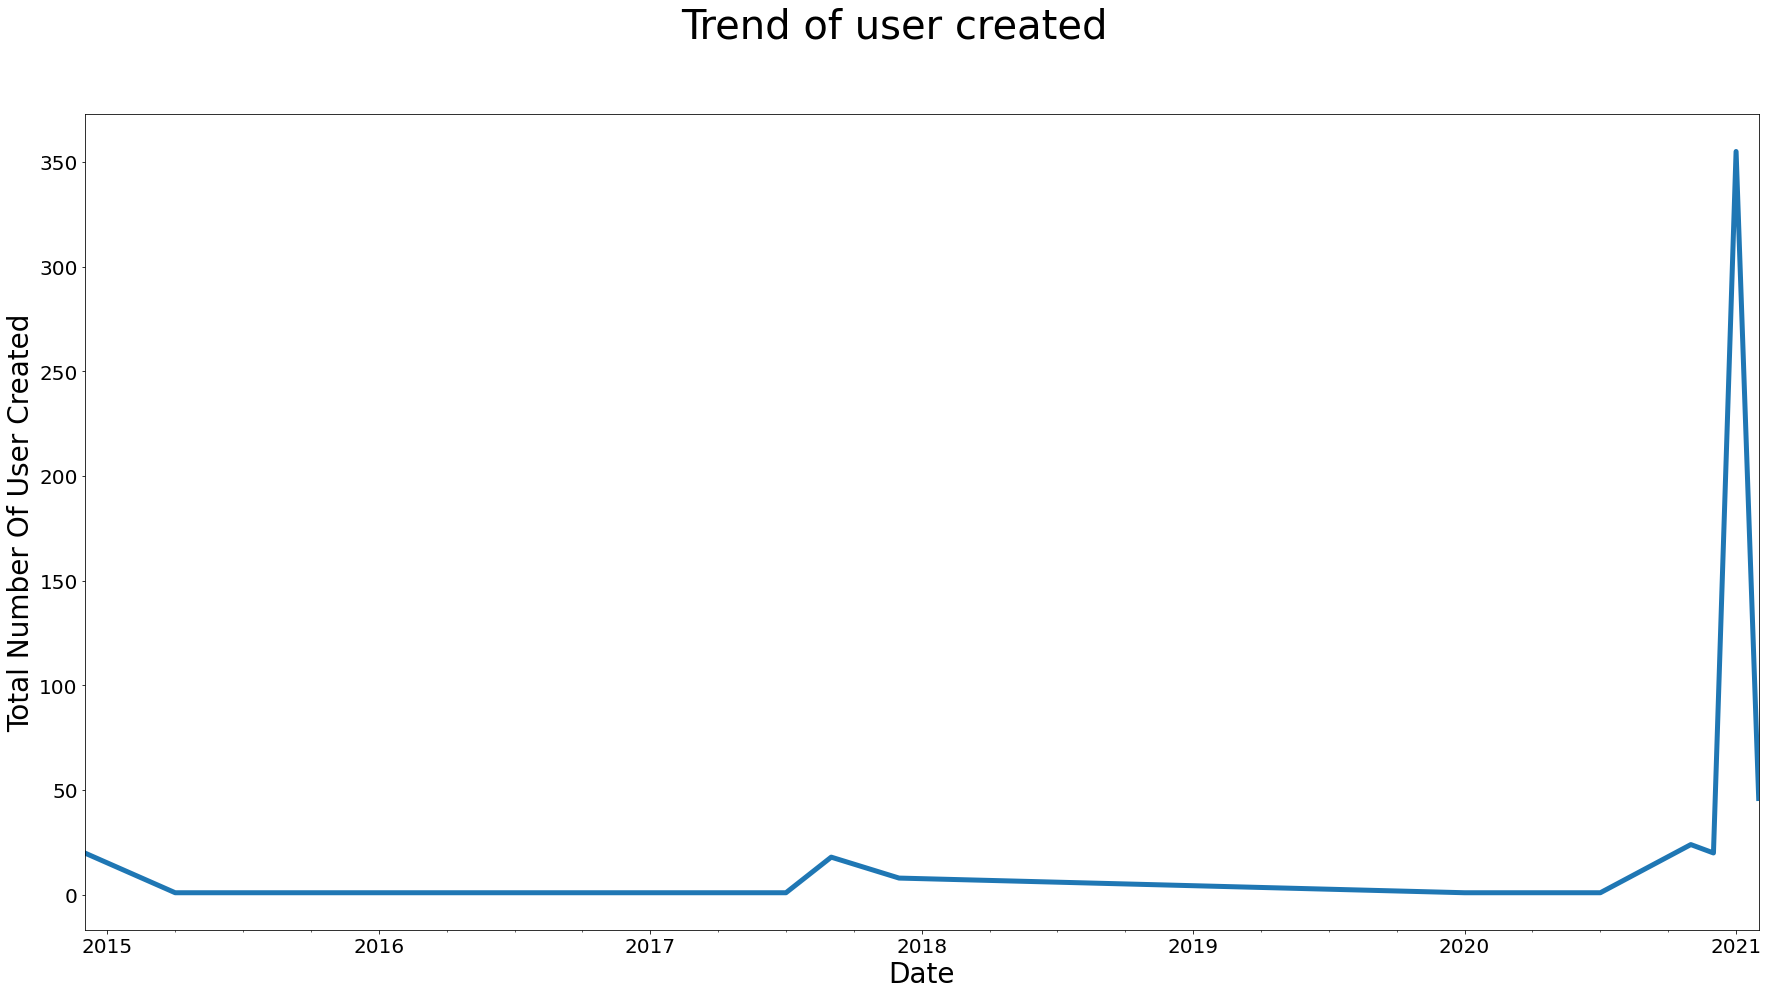

In [10]:
fig, ax1 = plt.subplots(figsize=(30,15))
fig.suptitle('Trend of user created', fontsize=40)
df1.plot(linewidth=5)
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Total Number Of User Created', fontsize=28)

plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

The graph show the trnd of total number of users created of each time.

## Data Quality Issue


- Some records has missing values but the proportion of missing values is not too big
- Data is heavily duplicated, with 57% of records are duplicated

# Part 2: Brands Dataset

## Import Dataset

In [11]:
df_brand = pd.read_csv('brands.csv')
df_brand.head()

,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_ref,cpg_id
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [12]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   name          1167 non-null   object 
 5   topBrand      555 non-null    float64
 6   brandCode     898 non-null    object 
 7   cpg_ref       1167 non-null   object 
 8   cpg_id        1167 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 82.2+ KB


In [13]:
# Change type of 'topBrand' from float to bool
df_brand['topBrand'] = df_brand['topBrand'].astype(bool)

## Check Missing Values And Percentage

In [14]:
# Check missing values
df_brand.isnull().sum()


_id               0
barcode           0
category        155
categoryCode    650
name              0
topBrand          0
brandCode       269
cpg_ref           0
cpg_id            0
dtype: int64

In [15]:
null_values_percentage = df_brand.isnull().mean()
for key, value in null_values_percentage.items():
    if value > 0:
        print(key, '-->', format(value, '.2%'))


category --> 13.28%
categoryCode --> 55.70%
brandCode --> 23.05%


Data has missing values. The missing value of categoryCode is significantly more than the missing value of category, which is not common. As explained from the point of view of the database, in the category entity, the categoryCode should exist as the primary key. It is uncommon for the primary key to be missing, but the rest of the attribute (category) is still present. Therefore, the missing value of categorycode is less than or equal to the missing value of category is more realistic

## Check Duplicate

In [16]:
row_count = df_brand.count()
duplicate_row_count = df_brand.count() - df_brand.nunique()
percentage = round((duplicate_row_count/row_count)*100, 2)
print('Total row count: ')
print(row_count)
print('Total duplicated row count:  ')
print(duplicate_row_count)
print('Percentage of duplicated row: ')
print(percentage)

Total row count: 
_id             1167
barcode         1167
category        1012
categoryCode     517
name            1167
topBrand        1167
brandCode        898
cpg_ref         1167
cpg_id          1167
dtype: int64
Total duplicated row count:  
_id                0
barcode            7
category         989
categoryCode     503
name              11
topBrand        1165
brandCode          2
cpg_ref         1165
cpg_id           971
dtype: int64
Percentage of duplicated row: 
_id              0.00
barcode          0.60
category        97.73
categoryCode    97.29
name             0.94
topBrand        99.83
brandCode        0.22
cpg_ref         99.83
cpg_id          83.20
dtype: float64


No duplicated record in this dataset, because the duplicated row count of id is 0

## Check Unique Objects

In [17]:
# Check unique category
df_brand['category'].unique()

array(['Baking', 'Beverages', 'Candy & Sweets', 'Condiments & Sauces',
       'Canned Goods & Soups', nan, 'Magazines', 'Breakfast & Cereal',
       'Beer Wine Spirits', 'Health & Wellness', 'Beauty', 'Baby',
       'Frozen', 'Grocery', 'Snacks', 'Household', 'Personal Care',
       'Dairy', 'Cleaning & Home Improvement', 'Deli',
       'Beauty & Personal Care', 'Bread & Bakery', 'Outdoor',
       'Dairy & Refrigerated'], dtype=object)

Some categories are duplicated or similar:
- Baking and Bread & Bakery
- Personal Care and Beauty & Personal Care and Beauty
- Dairy and Fronzen and Dairy & Refrigerated

In [18]:
# Merge similar categories
spelling = {'Baking': 'Bread & Bakery', 'Personal Care': 'Beauty & Personal Care',
            'Beauty': 'Beauty & Personal Care', 'Dairy': 'Dairy & Refrigerated',
            'Frozen': 'Dairy & Refrigerated'}
df_brand['category'].replace(spelling, inplace=True)
df_brand['category'].unique()

array(['Bread & Bakery', 'Beverages', 'Candy & Sweets',
       'Condiments & Sauces', 'Canned Goods & Soups', nan, 'Magazines',
       'Breakfast & Cereal', 'Beer Wine Spirits', 'Health & Wellness',
       'Beauty & Personal Care', 'Baby', 'Dairy & Refrigerated',
       'Grocery', 'Snacks', 'Household', 'Cleaning & Home Improvement',
       'Deli', 'Outdoor'], dtype=object)

## Data Exploratory Analysis

In [19]:
# Total count and percentage of each category
df2 = df_brand[['category', '_id']].groupby(['category']).agg('count')
df2 = df2.sort_values(by='_id', ascending=False)
df2_1 = (df_brand['category'].value_counts() / len(df_brand))*100
df2_2 = df2_1.map('{:,.2f}%'.format)
df2_3 = pd.merge(left=df2, right=df2_2, how='left', left_on=df2.index, right_on=df2_2.index)
df2_3 = df2_3.rename(columns={'key_0': 'Category', '_id': 'Total Count', 'category': 'Percentage'})
df2_3

,Category,Total Count,Percentage
0,Bread & Bakery,374,32.05%
1,Beer Wine Spirits,90,7.71%
2,Snacks,75,6.43%
3,Candy & Sweets,71,6.08%
4,Beverages,63,5.40%
5,Dairy & Refrigerated,62,5.31%
6,Magazines,44,3.77%
7,Health & Wellness,44,3.77%
8,Breakfast & Cereal,40,3.43%
9,Grocery,39,3.34%


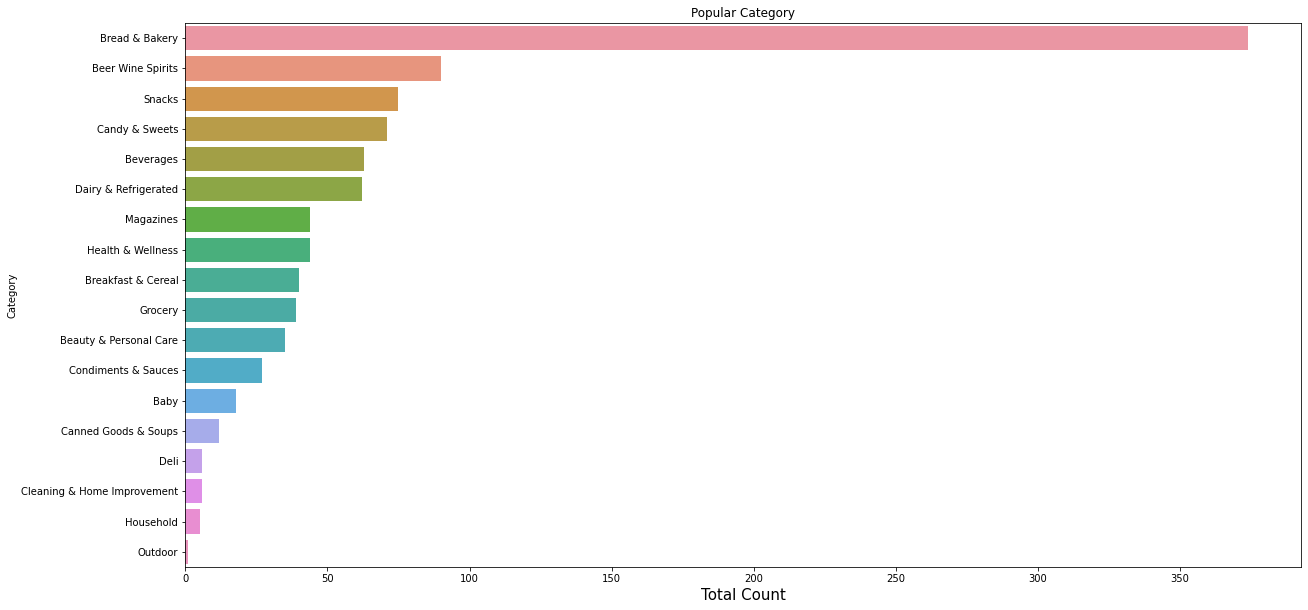

In [20]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=df2_3['Total Count'],y=df2_3['Category'])
ax.set_xlabel('Total Count', fontsize=15)
ax.set_title('Popular Category')
plt.show()

The graph show the total count of each category, Bread & Bakery is the most popular category which is significantly higher than other species

## Data Quality Issue


- The missing value of categoryCode is abnormally higher than the missing value of category
- Some categories are duplicated or similar

# Part 3: Receipts Dataset

## Import Dataset

In [21]:
df_receipt = pd.read_csv('receipt.csv', low_memory=False)
df_receipt.head()

,Unnamed: 0,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [22]:
df_receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1119 non-null   int64  
 1   _id                      1119 non-null   object 
 2   bonusPointsEarned        544 non-null    float64
 3   bonusPointsEarnedReason  544 non-null    object 
 4   createDate               1119 non-null   object 
 5   dateScanned              1119 non-null   object 
 6   finishedDate             568 non-null    object 
 7   modifyDate               1119 non-null   object 
 8   pointsAwardedDate        537 non-null    object 
 9   pointsEarned             609 non-null    float64
 10  purchaseDate             671 non-null    object 
 11  purchasedItemCount       635 non-null    float64
 12  rewardsReceiptItemList   679 non-null    object 
 13  rewardsReceiptStatus     1119 non-null   object 
 14  totalSpent              

## Check Missing Values And Percentage

In [23]:
df_receipt.isnull().sum()

Unnamed: 0                   0
_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [24]:
# Percentage of missing value
null_values_percentage = df_receipt.isnull().mean()
for key, value in null_values_percentage.items():
    if value > 0:
        print(key, '-->', format(value, '.2%'))

bonusPointsEarned --> 51.39%
bonusPointsEarnedReason --> 51.39%
finishedDate --> 49.24%
pointsAwardedDate --> 52.01%
pointsEarned --> 45.58%
purchaseDate --> 40.04%
purchasedItemCount --> 43.25%
rewardsReceiptItemList --> 39.32%
totalSpent --> 38.87%


The dataset has many missing values. 9 of the 15 columns have missing values. However, according to the content of the dataset, 0 still has meaning in many columns, such as bonusPointsEarned, bonusPointsEarnedReason, so the actual missing values should be less than the data shows. However, there are still problems in the data. The missing value of pointsAwardedDate is higher than that of pointsEarned, indicating that there are indeed missing values in the pointsAwardedDate column.

## Check Duplicate


In [25]:
row_count = df_receipt.count()
duplicate_row_count = df_receipt.count() - df_receipt.nunique()
percentage = round((duplicate_row_count/row_count)*100, 2)
print('Total row count: ')
print(row_count)
print('Total duplicated row count:  ')
print(duplicate_row_count)
print('Percentage of duplicated row: ')
print(percentage)

Total row count: 
Unnamed: 0                 1119
_id                        1119
bonusPointsEarned           544
bonusPointsEarnedReason     544
createDate                 1119
dateScanned                1119
finishedDate                568
modifyDate                 1119
pointsAwardedDate           537
pointsEarned                609
purchaseDate                671
purchasedItemCount          635
rewardsReceiptItemList      679
rewardsReceiptStatus       1119
totalSpent                  684
userId                     1119
dtype: int64
Total duplicated row count:  
Unnamed: 0                    0
_id                           0
bonusPointsEarned           532
bonusPointsEarnedReason     535
createDate                   12
dateScanned                  12
finishedDate                 15
modifyDate                   15
pointsAwardedDate            14
pointsEarned                490
purchaseDate                313
purchasedItemCount          585
rewardsReceiptItemList      296
rewardsRece

No duplicated record in this dataset, because the duplicated row count of id is 0

## Data Exploratory Analysis

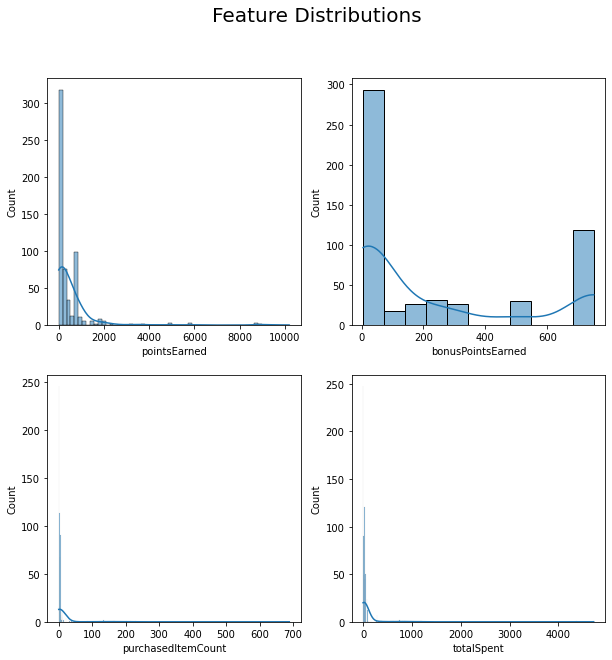

In [26]:
# Check feature distributions
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten() #allows axes to be looped over
plt.suptitle("Feature Distributions", fontsize=20)
for x, i in enumerate(df_receipt[['pointsEarned', 'bonusPointsEarned', 'purchasedItemCount', 'totalSpent']]):
    sns.histplot(df_receipt[i], ax = ax[x], kde=True, palette="Blues")

The data distribution is not uniform, where bonusPointsEarned does not exhibit a normal distribution. pointsEarned, purchasedItemCount, totalSpent present a right-skewed distribution

In [27]:
# Check corr between pointsEarned, bounsPointsEarned with the amount and count of the purchase
selected_columns = df_receipt.columns[2:]
corr_matrix = df_receipt[selected_columns].corr()

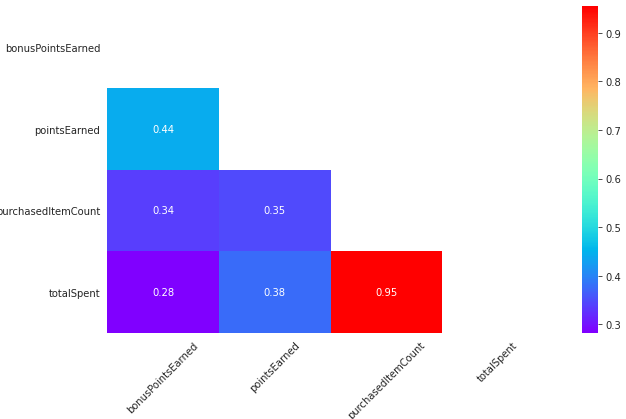

In [28]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(corr_matrix, annot=True, cmap='rainbow', mask=mask)
plt.xticks(rotation=45)
plt.show()

There is not a significant correlation between pointsEarned, bounsPointsEarned with the amount and count of the purchase

## Data quality issue

- There are many missing values in the dataset, but because 0 has meaning in some columns, the actual missing values are less than the missing values presented by the calculation. But still has problem like the missing value of pointsAwardedDate is more than that of pointsEarned, indicating that there are indeed missing values in the pointsAwardedDate column
- The data distribution is not uniform. Exhibit right-skewed distribution or not exhibit a normal distribution

## Colcusion


- The main data quality problem is that there are too many missing values in the dataset. 
- In addition:
    - Users dataset has lots of duplicate 
    - Brands dataset has duplicate in category column
    - Receipts dataset exhibits uneven data distribution